# Reporte de consumos y nominacones de complejos Deacero
# TEAM ENERGÍA: José Jiménez González e Iván López García

## Librerías utilizadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Lectura de base de datos 

In [2]:
deacerodb=pd.read_csv("DB P&L.csv")
deacerodb.head()

,Fecha,Hora,PML MDA CELAYA,PML MTR CELAYA,PML MDA RAMOS,PML MTR RAMOS,PML MDA SALTILLO,PML MTR SALTILLO,NOM CELAYA,CON CELAYA,NOM RAMOS,CON RAMOS,NOM SALTILLO,CON SALTILLO
0,2022-08-01,1,1460.96,1378.46,1490.66,1367.28,1495.11,1372.00,164.578,156.854812,97.5,95.08626,11.75,9.632
1,2022-08-01,2,1446.18,1408.64,1462.27,1389.57,1466.64,1393.67,162.493,154.865984,96.1,94.50300,11.74,9.310
2,2022-08-01,3,1432.84,1403.85,1439.35,1378.53,1443.95,1383.43,166.793,166.788880,96.2,107.43032,11.86,9.084
3,2022-08-01,4,1432.31,1387.27,1435.52,1363.78,1441.11,1369.52,166.588,149.726676,94.3,114.65114,11.49,9.277
4,2022-08-01,5,1426.85,1355.97,1428.72,1337.19,1435.12,1343.72,163.343,151.159842,94.0,84.71968,11.78,9.287


## Consolidacion de columnas de fecha y hora como indice de DataFrames  

In [3]:
deacerodb['Fecha']=pd.to_datetime(deacerodb['Fecha'])
Dia=pd.DatetimeIndex(deacerodb["Fecha"]).weekday
deacerodb.insert(loc=2,column="Dia",value=Dia)

deacerodb_datestr=deacerodb[['Fecha','Hora']]
deacerodb_datetime=pd.DataFrame({'Fecha': deacerodb.Fecha+pd.to_timedelta(deacerodb.Hora,unit='h')})
deacerodb['Fecha']=deacerodb_datetime['Fecha']
deacerodb.set_index('Fecha',inplace=True)

deacerodb.head()

,Hora,Dia,PML MDA CELAYA,PML MTR CELAYA,PML MDA RAMOS,PML MTR RAMOS,PML MDA SALTILLO,PML MTR SALTILLO,NOM CELAYA,CON CELAYA,NOM RAMOS,CON RAMOS,NOM SALTILLO,CON SALTILLO
Fecha,,,,,,,,,,,,,,
2022-08-01 01:00:00,1,0,1460.96,1378.46,1490.66,1367.28,1495.11,1372.00,164.578,156.854812,97.5,95.08626,11.75,9.632
2022-08-01 02:00:00,2,0,1446.18,1408.64,1462.27,1389.57,1466.64,1393.67,162.493,154.865984,96.1,94.50300,11.74,9.310
2022-08-01 03:00:00,3,0,1432.84,1403.85,1439.35,1378.53,1443.95,1383.43,166.793,166.788880,96.2,107.43032,11.86,9.084
2022-08-01 04:00:00,4,0,1432.31,1387.27,1435.52,1363.78,1441.11,1369.52,166.588,149.726676,94.3,114.65114,11.49,9.277
2022-08-01 05:00:00,5,0,1426.85,1355.97,1428.72,1337.19,1435.12,1343.72,163.343,151.159842,94.0,84.71968,11.78,9.287


### Cálculo de DART, P&L y MAPE
$$DART = MDA - MTR$$
$$PnL= DART(E_{nom}-E_{con})$$
$$MAPE_d=\frac{1}{24}\sum_{h=1}^{h=24} \frac{E_{nom,h}-E_{con,h}}{E_{nom,h}}$$

In [4]:
complejo=["CELAYA","RAMOS","SALTILLO"]
#complejo=["CELAYA"]
ConNom,DART,PnL,MAPE=pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()
for i in complejo:
    ConNom["CON "+i]=deacerodb["CON "+i]
    ConNom["NOM "+i]=deacerodb["NOM "+i]
    DART["DART "+i]=deacerodb["PML MDA "+i]- deacerodb["PML MTR "+i]
    PnL["PnL "+i]=(deacerodb["NOM "+i]- deacerodb["CON "+i])*DART["DART "+i]
    ape=np.abs((ConNom["NOM "+i]-ConNom["CON "+i])/ConNom["NOM "+i])
    MAPE["MAPE "+i]=100*ape.resample("D").mean()

### Desviaciones y P&L de mes corriente

In [5]:
colors={"CELAYA":['#A9D18E','#548235'],"RAMOS":['#8BA7DB','#2F5597'],"SALTILLO":['#FFD966','#BF9000']}
mes=deacerodb.index[-1].month
mesdb=deacerodb[deacerodb.index.month==mes]

El P&L del complejo CELAYA es de 78493.59905765513
El P&L del complejo RAMOS es de -108679.29836382807
El P&L del complejo SALTILLO es de -6064.253910000009


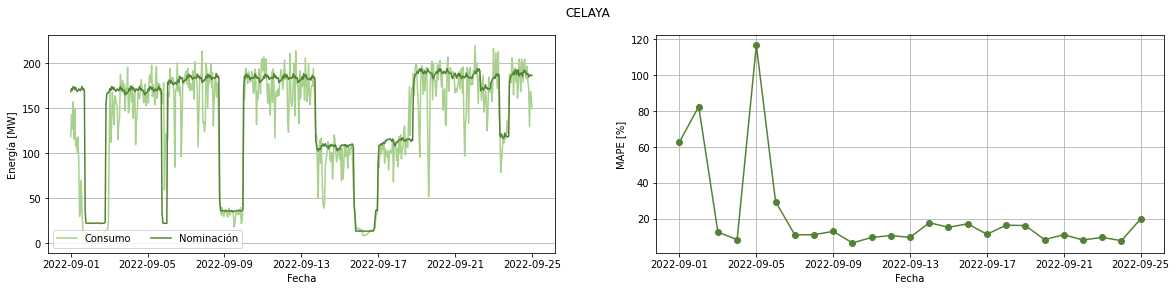

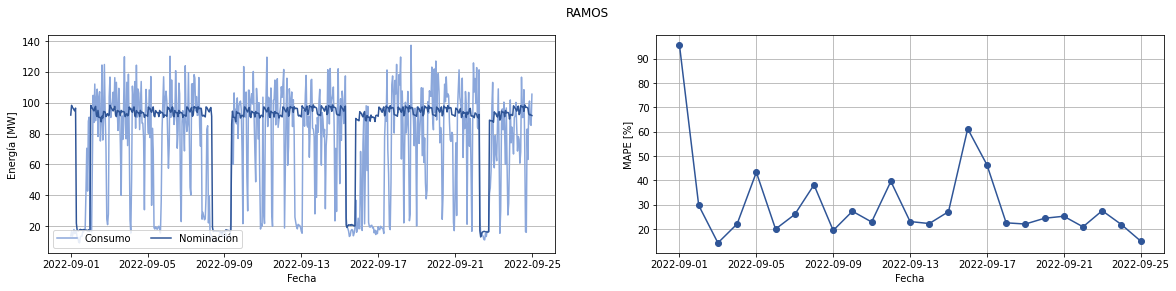

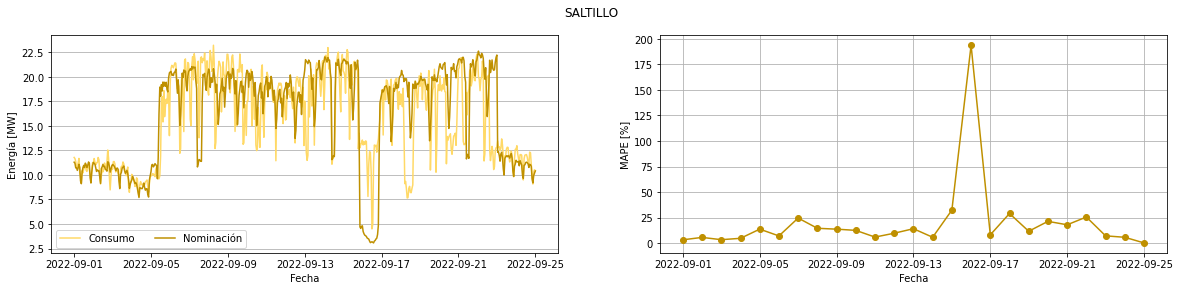

In [27]:
for i in complejo:
    fig,ax=plt.subplots(1,2,figsize=(20,4))
    fig.suptitle(i)
    ax[0].plot(ConNom[ConNom.index.month==mes]["CON "+i],color=colors[i][0],label='Consumo')
    ax[0].plot(ConNom[ConNom.index.month==mes]["NOM "+i],color=colors[i][1],label='Nominación')
    ax[0].set_xlabel("Fecha")
    ax[0].set_ylabel("Energía [MW]")
    ax[0].grid(axis='y')
    ax[0].legend(loc=3, fontsize = 10,ncol=2)#poisición de las etiquetas
    ax[1].plot(MAPE[MAPE.index.month==mes]["MAPE "+i],color=colors[i][1],marker='o')
    ax[1].grid()
    ax[1].set_xlabel("Fecha")
    ax[1].set_ylabel("MAPE [%]")
    plt.savefig("ConsumoNominacion{}.jpg".format(i),dpi=300)
    print("El P&L del complejo "+i+" es de",PnL[PnL.index.month==mes]["PnL "+i].sum())

# Cálculo de desviaciones y P&L por incidente  

In [11]:
complejoIncidente="CELAYA"
fechaInicio='2022-09-01'
fechaFin='2022-09-02'

El P&L del incidente analizado es de 61839.43658187003


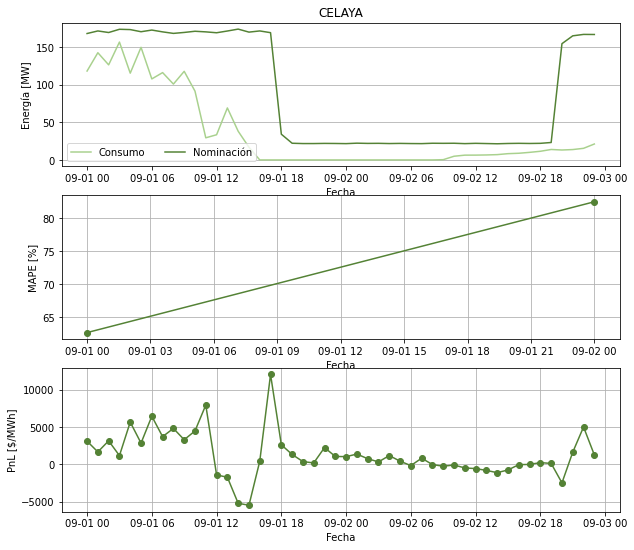

In [30]:
fig,ax=plt.subplots(3,1,figsize=(10,9))
ax[0].plot(ConNom[fechaInicio:fechaFin]["CON "+complejoIncidente],color=colors[complejoIncidente][0],label='Consumo')
ax[0].plot(ConNom[fechaInicio:fechaFin]["NOM "+complejoIncidente],color=colors[complejoIncidente][1],label='Nominación')
ax[0].set_title(complejoIncidente)
ax[0].set_xlabel("Fecha")
ax[0].set_ylabel("Energía [MW]")
ax[0].grid(axis='y')
ax[0].legend(loc=3, fontsize = 10,ncol=2)#poisición de las etiquetas
ax[1].plot(MAPE[fechaInicio:fechaFin]["MAPE "+complejoIncidente],color=colors[complejoIncidente][1],marker='o')
ax[1].grid()
ax[1].set_xlabel("Fecha")
ax[1].set_ylabel("MAPE [%]")
ax[2].plot(PnL[fechaInicio:fechaFin]["PnL "+complejoIncidente],color=colors[complejoIncidente][1],marker='o')
ax[2].grid()
ax[2].set_xlabel("Fecha")
ax[2].set_ylabel("PnL [$/MWh]")
plt.savefig("Incidente{}_{}.jpg".format(i,fechaInicio),dpi=300)
print("El P&L del incidente analizado es de", PnL[fechaInicio:fechaFin]["PnL "+complejoIncidente].sum())

## Heatmaps de precios y DART

In [13]:
deacerodb.index[-1]-pd.Timedelta(days=21)

diasHM=21
complejoHM="CELAYA"
fechaFinHM=deacerodb.index[-1]
fechaInicioHM=fechaFinHM-pd.Timedelta(days=diasHM)
MDAHM=pd.pivot_table(deacerodb[fechaInicioHM:fechaFinHM],values="PML MDA "+complejoHM,index="Hora",columns="Dia")
DARTHM=pd.pivot_table(pd.concat([deacerodb[fechaInicioHM:fechaFinHM][["Hora","Dia"]],
                                 DART[fechaInicioHM:fechaFinHM]["DART "+complejoHM]],axis=1),
                      values="DART "+complejoHM,index="Hora",columns="Dia")


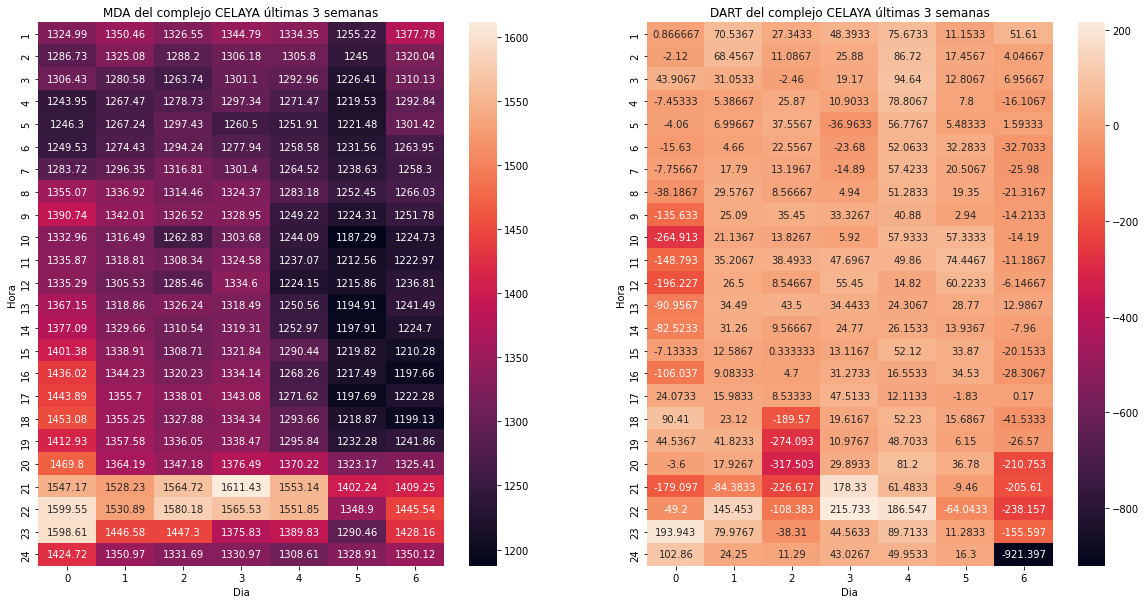

In [29]:
fig, ax=plt.subplots(1,2,figsize=(20,10))
sns.heatmap(MDAHM,annot=True,fmt="g",ax=ax[0])
ax[0].set_title("MDA del complejo "+complejoHM+" últimas 3 semanas")
sns.heatmap(DARTHM,annot=True,fmt="g",ax=ax[1])
ax[1].set_title("DART del complejo "+complejoHM+" últimas 3 semanas")
plt.savefig("HM.jpg",dpi=300)